# Projeto de Ciência dos Dados

#### Nome: Antonio Saporiti

## Introdução

Com o intuito de verificar o impacto do Mercado Comum do Sul (MERCOSUL) nos países que recém aderiram ao acordo, foram investigados dois fatores: capital estrangeiro recebido e o PIB. Desse modo, elaborou-se a pergunta: *Como os países pertencentes ao MERCOSUL reagem (economicamente) a "diminuição de investimentos externos"?*.
Essa diminuição de investimentos esperada se deve à lei da Tarifa Externa Comum, que assegura a proteção ao comércio intrabloco. Com isso, espera-se que os acordos economicos entre os países do bloco econômico sejam suficientes para garantir o crescimento do PIB, livrando-os da dependência de investimentos externos.

## Análises dos dados

### Importando as tabelas e bibliotecas

O programa importa os dados retirados do Gapminder, além de importar as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#capital estrangeiro para investimentos
capital_i = pd.read_excel('foreign_direct_investment_net_inflows_percent_of_gdp.xlsx')
#PIB
PIB = pd.read_excel("total_gni_ppp_current_international (1).xlsx")
#Observação: tabela usada p/ separar por região
region = pd.read_excel('landlocked_region.xlsx')

## Mudança de índices

alterando os índices das tabelas para poder juntá-las posteriormente.

In [2]:
capital_i_idx = capital_i.set_index('Country')
PIB_idx = PIB.set_index('Country')
region_idx = region.set_index('Country')

## Comparação dos países pertencentes ao MERCOSUL

Nesse bloco, os países pertencentes ao MERCOSUL serão subdividios em duas categorias, a primeira será dos países que formaram o bloco econômico e a segunda, dos países que aderiram posteriormente ao bloco. Agora, os países da América do Sul serão separados dos demais.

In [3]:
paises_am = region_idx[region_idx['region'] == 'america_south'].iloc[:,[0]]
paises_am

,region
Country,
Argentina,america_south
Bolivia,america_south
Brazil,america_south
Chile,america_south
Colombia,america_south
Ecuador,america_south
Guyana,america_south
Paraguay,america_south
Peru,america_south


## Categorizando os países

categorização dos países da América do Sul pertencentes ao MERCOSUL

In [4]:
mercosul_Estados_Partes = ["Argentina", "Brazil", "Paraguay", "Uruguay"]
mercosul_Estados_Associados = ["Bolivia", "Chile","Colombia","Ecuador", "Guyana","Peru","Suriname"]

In [5]:
paises_am.loc[:,"MERCOSUL_Estados_Partes"] = "não"
paises_am.loc[:,"MERCOSUL_Estados_Associados"] = "não"
paises_am.head(12)

,region,MERCOSUL_Estados_Partes,MERCOSUL_Estados_Associados
Country,,,
Argentina,america_south,não,não
Bolivia,america_south,não,não
Brazil,america_south,não,não
Chile,america_south,não,não
Colombia,america_south,não,não
Ecuador,america_south,não,não
Guyana,america_south,não,não
Paraguay,america_south,não,não
Peru,america_south,não,não


In [6]:
paises_am.loc[mercosul_Estados_Partes,"MERCOSUL_Estados_Partes"] = "sim"
paises_am.loc[mercosul_Estados_Associados,"MERCOSUL_Estados_Associados"] = "sim"
paises_am.head(12)

,region,MERCOSUL_Estados_Partes,MERCOSUL_Estados_Associados
Country,,,
Argentina,america_south,sim,não
Bolivia,america_south,não,sim
Brazil,america_south,sim,não
Chile,america_south,não,sim
Colombia,america_south,não,sim
Ecuador,america_south,não,sim
Guyana,america_south,não,sim
Paraguay,america_south,sim,não
Peru,america_south,não,sim


## Seleção do tempo

Os anos escolhidos apresentam um distanciamento de 10 anos (anteriores e posteriores) da ingressão de países como a Colombia (2003) e a Equador (2003)

In [7]:
capital_i_tempo = capital_i_idx.iloc[:, 26:43]
PIB_t = PIB_idx.iloc[:, 6:23]

## Junção dos Dados

Criando uma tabela que possui os dados dos países da america do sul.

In [8]:
capital = paises_am.join(capital_i_tempo, how = 'inner')

In [9]:
capital

,region,MERCOSUL_Estados_Partes,MERCOSUL_Estados_Associados,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country,,,,,,,,,,,,,,,,,,,,
Argentina,america_south,sim,não,2.550,3.130,2.440,8.460,3.670,0.806,2.200,1.290,2.510,2.6500,2.380,2.250,2.690,1.210,2.680,2.040,2.810
Bolivia,america_south,não,sim,6.410,9.220,11.200,12.200,8.770,8.670,8.560,2.440,0.746,-2.5000,2.450,2.790,3.070,2.440,3.170,3.580,3.910
Brazil,america_south,sim,não,1.320,2.220,3.690,4.770,5.030,4.150,3.270,1.810,2.720,1.7300,1.750,3.190,2.990,1.890,4.000,3.870,3.510
Chile,america_south,não,sim,6.170,6.210,5.670,11.700,6.240,5.920,3.660,5.320,6.850,6.0700,4.900,7.760,10.300,8.040,7.330,9.570,11.300
Colombia,america_south,não,sim,3.200,5.210,2.870,1.750,2.440,2.590,2.180,1.820,2.660,6.9800,4.150,4.280,4.330,3.440,2.240,4.370,4.070
Ecuador,america_south,não,sim,1.980,2.570,3.110,3.300,-0.128,2.200,2.740,2.690,2.290,1.1900,0.580,0.380,1.710,0.494,0.238,0.812,0.645
Guyana,america_south,não,sim,8.360,6.940,6.130,6.620,9.420,8.040,6.030,3.520,3.820,9.3100,7.020,8.760,9.260,7.960,8.710,9.580,9.710
Paraguay,america_south,sim,não,1.530,2.370,3.790,1.130,1.320,1.290,1.430,-0.876,1.170,0.0836,1.760,0.761,1.830,0.169,2.770,1.850,2.960
Peru,america_south,não,sim,6.280,3.680,2.960,3.870,1.560,2.200,3.940,2.270,2.390,3.3900,3.910,5.370,5.740,5.320,5.730,4.270,6.120


## Plotagem e análise do capital investido

Análise temporal do capital externo investido nos países pertencentes ao MERCOSUL 

Text(0, 0.5, 'Média do capital externo investido')

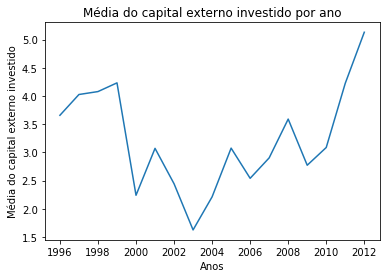

In [10]:
capital.iloc[:,3:].mean().plot()
plt.title("Média do capital externo investido por ano")
plt.xlabel("Anos")
plt.ylabel("Média do capital externo investido")

Nesse gráfico, percebe-se que no ano de 2003 os investimentos externos, de forma geral, caíram em relação aos outros anos. Esse fator corrobora a influência da TEC nos países recem chegados ao bloco, causando uma redução de investimentos estrangeiros na América do Sul. No entanto, a meédia nos anos seguintes tende a aumentar, comprometendo a autossuficiência do bloco.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF5CB50B00>,
      dtype=object)

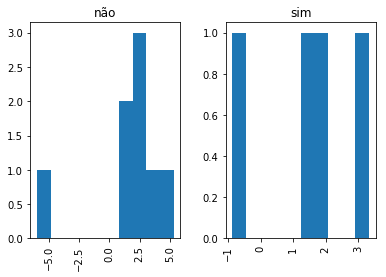

In [11]:
capital.hist(column = 2003, by = "MERCOSUL_Estados_Partes")

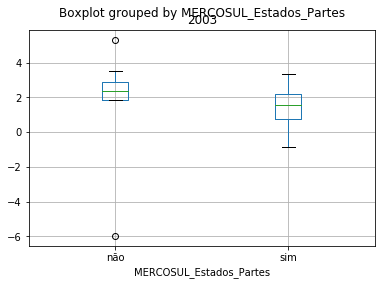

In [12]:
capital.boxplot(column=2003, by="MERCOSUL_Estados_Partes")

Para as plotagens acima, é possível depreender que houve uma acentuação da política protecionista intrabloco, na qual Estados Partes estabelecem a Tarifa Externa Comum, diminuindo os investimentos externos. A título de exemplo, no boxplot é possível observar uma homogeneidade maior entre os investimentos externos dos países no ano de 2003.

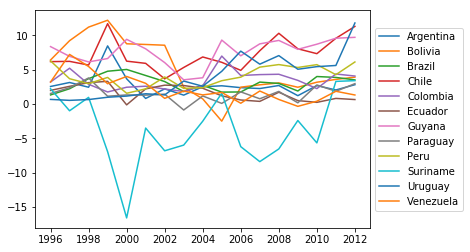

In [13]:
capital.transpose().iloc[3:].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

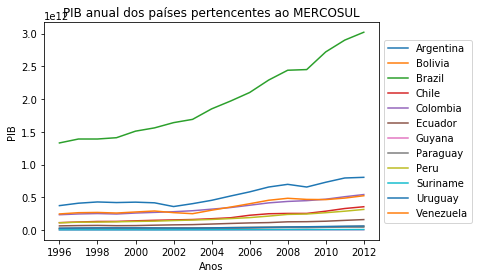

In [14]:
pib = paises_am.join(PIB_t, how = "inner")
pib.transpose().iloc[3:].plot()
plt.title("PIB anual dos países pertencentes ao MERCOSUL")
plt.xlabel("Anos")
plt.ylabel("PIB")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Análise do capital externo investido X PIB

A partir de agora, serão comparados países fora do bloco ecônomico, com PIBs parecidos, com
o intuito de analisar o cenário global de investimentos externos.

In [15]:
mercosul = ["Argentina", "Paraguay", "Uruguay", "Bolivia", "Chile","Colombia","Ecuador", "Guyana","Peru","Suriname"]
selecionado = ["Australia", "Austria", "Poland", "Mexico", "Egypt", "South Africa", "Switzerland", "Netherlands","Belgium"]
PIB_t.loc[:, "MERCOSUL"] = "não pertence"
PIB_t.loc[:, "Selecionado"] = "não"
PIB_t.loc[mercosul,'MERCOSUL'] = "pertence"
PIB_t.loc[selecionado,'Selecionado'] = "sim"
PIB_t

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,MERCOSUL,Selecionado
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,1.920000e+10,2.130000e+10,2.210000e+10,2.540000e+10,2.780000e+10,3.230000e+10,3.420000e+10,4.170000e+10,4.570000e+10,49900000000,5.840000e+10,não pertence,não
Albania,1.010000e+10,9.120000e+09,1.030000e+10,1.170000e+10,1.280000e+10,1.410000e+10,1.490000e+10,1.600000e+10,1.710000e+10,1.830000e+10,2.040000e+10,2.230000e+10,2.440000e+10,2.540000e+10,2.780000e+10,29700000000,3.030000e+10,não pertence,não
Algeria,1.960000e+11,2.040000e+11,2.170000e+11,2.270000e+11,2.400000e+11,2.580000e+11,2.740000e+11,3.000000e+11,3.200000e+11,3.470000e+11,3.680000e+11,4.000000e+11,4.210000e+11,4.300000e+11,4.540000e+11,473000000000,4.940000e+11,não pertence,não
Angola,2.300000e+10,2.850000e+10,2.910000e+10,2.760000e+10,3.050000e+10,3.290000e+10,4.000000e+10,4.310000e+10,4.860000e+10,5.950000e+10,7.260000e+10,9.410000e+10,1.050000e+11,1.170000e+11,1.220000e+11,130000000000,1.390000e+11,não pertence,não
Antigua and Barbuda,9.200000e+08,9.960000e+08,1.060000e+09,1.110000e+09,1.190000e+09,1.180000e+09,1.190000e+09,1.290000e+09,1.400000e+09,1.550000e+09,1.800000e+09,2.020000e+09,2.050000e+09,1.820000e+09,1.730000e+09,1720000000,1.800000e+09,não pertence,não
Argentina,3.730000e+11,4.100000e+11,4.290000e+11,4.200000e+11,4.260000e+11,4.160000e+11,3.590000e+11,4.030000e+11,4.540000e+11,5.200000e+11,5.830000e+11,6.570000e+11,6.980000e+11,6.570000e+11,7.300000e+11,795000000000,8.050000e+11,pertence,não
Armenia,5.650000e+09,6.120000e+09,6.460000e+09,6.770000e+09,7.310000e+09,8.220000e+09,9.500000e+09,1.100000e+10,1.250000e+10,1.480000e+10,1.740000e+10,2.040000e+10,2.240000e+10,1.900000e+10,1.980000e+10,20900000000,2.290000e+10,não pertence,não
Australia,3.880000e+11,4.100000e+11,4.380000e+11,4.630000e+11,4.890000e+11,5.160000e+11,5.490000e+11,5.740000e+11,6.120000e+11,6.390000e+11,6.820000e+11,7.270000e+11,7.620000e+11,8.420000e+11,8.320000e+11,898000000000,9.420000e+11,não pertence,sim
Austria,1.950000e+11,2.020000e+11,2.110000e+11,2.170000e+11,2.330000e+11,2.360000e+11,2.510000e+11,2.600000e+11,2.750000e+11,2.870000e+11,3.120000e+11,3.260000e+11,3.470000e+11,3.410000e+11,3.550000e+11,374000000000,3.920000e+11,não pertence,sim


In [19]:
capital_i_tempo.loc[:, "MERCOSUL"] = "não pertence"
capital_i_tempo.loc[:, "Selecionado"] = "não"
capital_i_tempo.loc[mercosul, "MERCOSUL"] = "pertence"
capital_i_tempo.loc[selecionado,'Selecionado'] = "sim"
capital_i_tempo

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,MERCOSUL,Selecionado
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,0.0276,1.2100,1.2600,3.54000,4.3200,3.37000,1.9200,0.3960,0.4490,1.2000,0.291,0.2770,não pertence,não
Albania,2.72000,2.01000,1.6600,1.2100,3.9400,5.1000,3.0400,3.1000,4.67000,3.2200,3.62000,6.1000,9.7300,11.2000,9.1400,8.130,7.4500,não pertence,não
Algeria,0.57500,0.54000,1.2600,0.6000,0.5110,2.0300,1.8800,0.9400,1.03000,1.1200,1.57000,1.2500,1.5400,2.0000,1.4300,1.290,0.7180,não pertence,não
Angola,2.40000,5.38000,17.1000,40.2000,9.6200,24.0000,14.0000,25.2000,11.20000,-4.6200,-0.09020,-1.4800,1.9900,2.9200,-3.9100,-2.900,-6.0500,não pertence,não
Antigua and Barbuda,3.05000,3.37000,3.1300,6.7600,5.1900,12.3000,8.0900,19.4000,8.74000,21.6000,31.00000,25.8000,11.6000,6.5900,8.3900,5.710,10.7000,não pertence,não
Argentina,2.55000,3.13000,2.4400,8.4600,3.6700,0.8060,2.2000,1.2900,2.51000,2.6500,2.38000,2.2500,2.6900,1.2100,2.6800,2.040,2.8100,pertence,não
Armenia,1.10000,3.17000,11.7000,6.6100,5.4500,3.3000,4.6600,4.3800,6.91000,5.9600,7.31000,7.2500,8.0900,8.7900,5.7200,6.440,4.6800,não pertence,não
Australia,1.54000,1.76000,1.4900,0.8520,3.5900,2.8300,3.7200,1.9300,7.01000,-3.6200,4.10000,5.2200,4.2900,3.1000,3.0800,4.700,3.7300,não pertence,sim
Austria,1.86000,1.23000,2.1300,1.3900,4.3300,2.9900,0.1490,2.7100,1.29000,25.7000,3.12000,17.7000,1.4700,3.5700,-5.6200,5.330,1.2700,não pertence,sim


### Montagem dos gráficos

Agora serão montadas os gráficos para validação final da hipótese.

Series([], Name: 2003, dtype: float64)

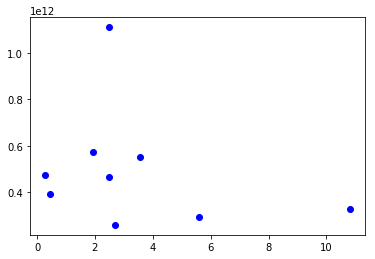

In [21]:
plt.scatter(capital_i_tempo.loc[capital_i_tempo.MERCOSUL == "sim" ,2003], PIB_t.loc[PIB_t.MERCOSUL=="sim", 2003], color="r")
plt.scatter(capital_i_tempo.loc[capital_i_tempo.Selecionado == "sim" ,2003], PIB_t.loc[PIB_t.Selecionado=="sim", 2003], color="b")
capital_i_tempo.loc[capital_i_tempo.Selecionado == "sim" ,2003]
capital_i_tempo.loc[capital_i_tempo.MERCOSUL == "sim" ,2003]